# Lending Club Loan Data Analysis
## Course-end Project 2

## DESCRIPTION

##### Create a model that predicts whether or not a loan will be default using the historical data.

### Problem Statement:  

##### For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

### Domain: Finance

### Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 



# Steps to perform:

##### Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

### Tasks:

##### 1.     Feature Transformation

##### Transform categorical values into numerical values (discrete)

##### 2.     Exploratory data analysis of different factors of the dataset.

##### 3.     Additional Feature Engineering

##### You will check the correlation between features and will drop those features which have a strong correlation

##### This will help reduce the number of features and will leave you with the most relevant features

##### 4.     Modeling

##### After applying EDA and feature engineering, you are now ready to build the predictive models

##### In this part, you will create a deep learning model using Keras with Tensorflow backend

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
from pickle import dump, load

%matplotlib inline

In [2]:
data = pd.read_csv("loan_data.csv")

In [3]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
data.shape

(9578, 14)

In [5]:
data.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [6]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
data.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

# Feature Transformation

## #Transform categorical values into numerical values

In [9]:
data_loan = data.select_dtypes(include=["object"]).copy()

In [10]:
data_loan.head(20)

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
5,credit_card
6,debt_consolidation
7,all_other
8,home_improvement
9,debt_consolidation


In [11]:
data_loan[data_loan.isnull().any(axis=1)]

,purpose


In [12]:
data_loan["purpose"].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [13]:
data_loan = data_loan.fillna({"purpose" : "credit_card"})

In [14]:
cleanup_nums = {"purpose": {"credit_card": 1,"debt_consolidation": 2}}

In [15]:
data_loan=data_loan.replace(cleanup_nums)
data_loan.head()

,purpose
0,2
1,1
2,2
3,2
4,1


In [16]:
data_loan.head()

,purpose
0,2
1,1
2,2
3,2
4,1


# EDA

Text(0.5, 0, 'FICO')

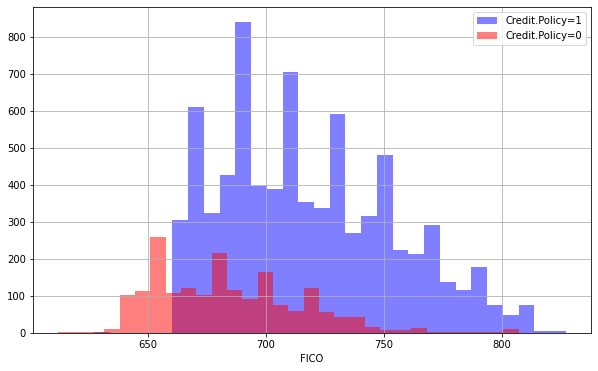

In [17]:
plt.figure(figsize=(10,6))
data[data['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
data[data['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

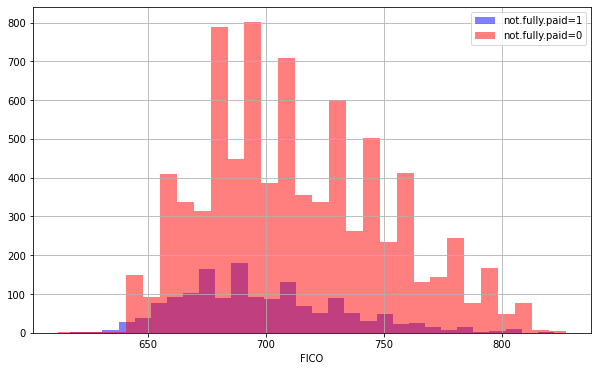

In [18]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
data[data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

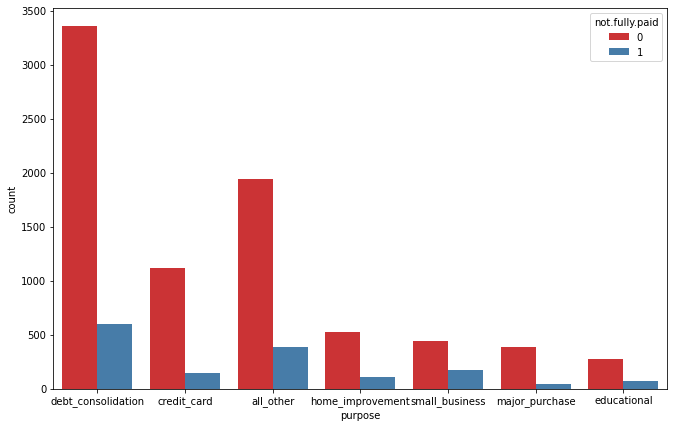

In [19]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=data,palette='Set1')

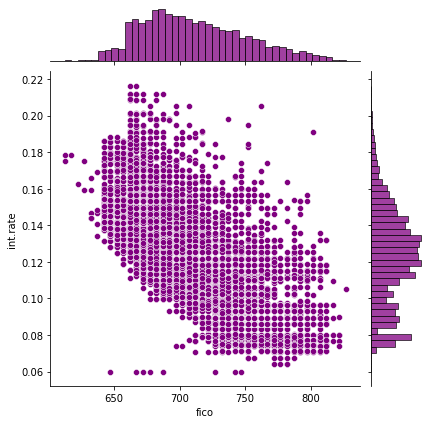

In [20]:
sns.jointplot(x='fico',y='int.rate',data=data,color='purple')

<Figure size 792x504 with 0 Axes>

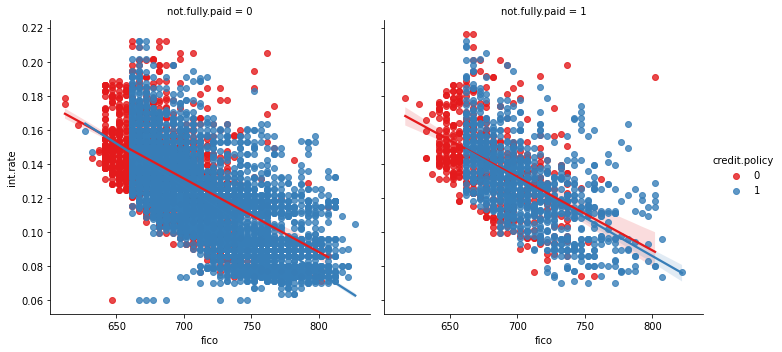

In [21]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [22]:
loan_num = data.select_dtypes(include = ['float64','int64'])
loan_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


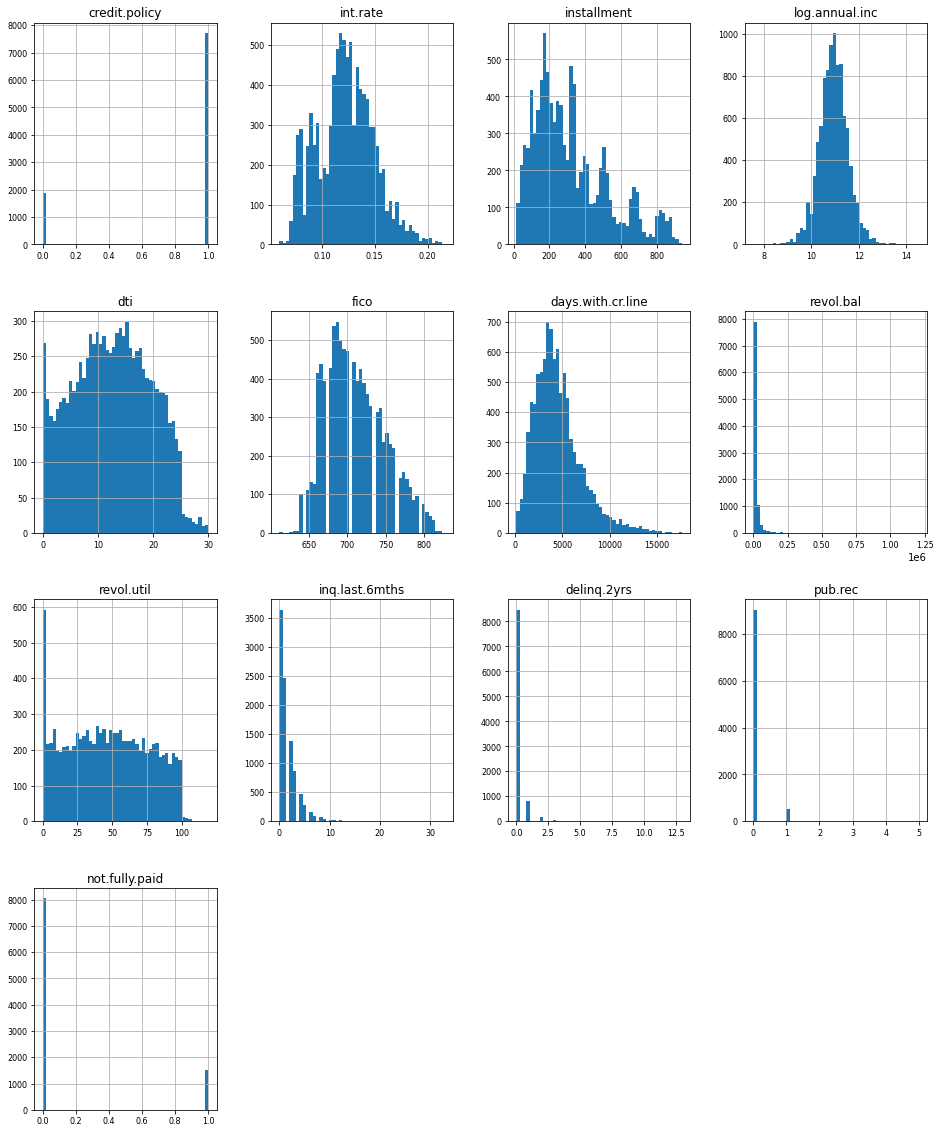

In [23]:
loan_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

# Additional Feature Engineering

## Correlation Matrix

In [24]:
cor_matrix = data.corr()
print(cor_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

In [25]:
cor_matrix1 = data.corr().abs()
print(cor_matrix1)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000  0.294089     0.058770        0.034906   
int.rate                0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                     0.090901  0.220006     0.050202        0.054065   
fico                    0.348319  0.714821     0.086039        0.114576   
days.with.cr.line       0.099026  0.124022     0.183297        0.336896   
revol.bal               0.187518  0.092527     0.233625        0.372140   
revol.util              0.104095  0.464837     0.081356        0.054881   
inq.last.6mths          0.535511  0.202780     0.010419        0.029171   
delinq.2yrs             0.076318  0.156079     0.004368        0.029203   
pub.rec                 0.054243  0.098162     0.032760        0.016506   
not.fully.paid          0

In [26]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy                NaN -0.294089      0.05877        0.034906   
int.rate                     NaN       NaN      0.27614        0.056383   
installment                  NaN       NaN          NaN        0.448102   
log.annual.inc               NaN       NaN          NaN             NaN   
dti                          NaN       NaN          NaN             NaN   
fico                         NaN       NaN          NaN             NaN   
days.with.cr.line            NaN       NaN          NaN             NaN   
revol.bal                    NaN       NaN          NaN             NaN   
revol.util                   NaN       NaN          NaN             NaN   
inq.last.6mths               NaN       NaN          NaN             NaN   
delinq.2yrs                  NaN       NaN          NaN             NaN   
pub.rec                      NaN       NaN          NaN             NaN   
not.fully.paid           

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

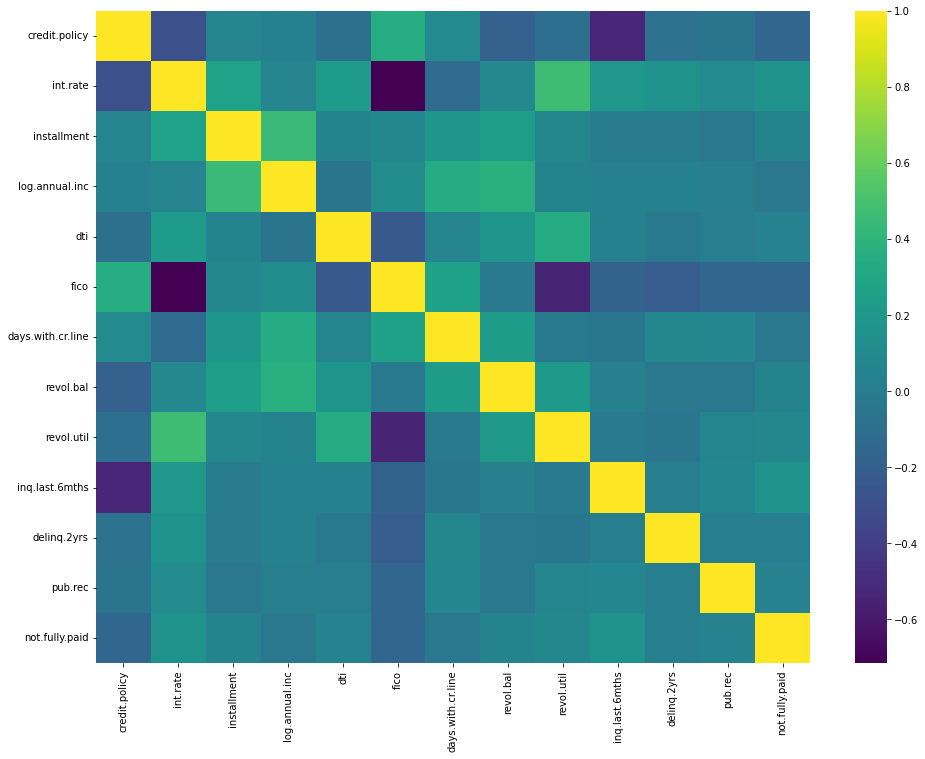

In [27]:
data.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=data.corr(), 
        cmap='viridis', 
        annot=False, 
        fmt='.2g'
)

In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [29]:
data['not.fully.paid'].isnull().mean()
data.groupby('not.fully.paid')['not.fully.paid'].count()/len(data)

not.fully.paid
0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

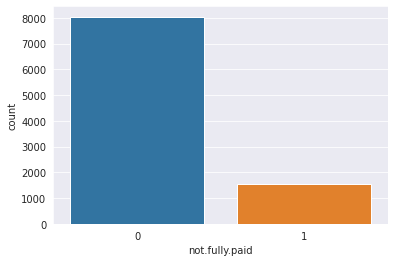

In [30]:
sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=data)

Random over-sampling:
1    8045
0    8045
Name: not.fully.paid, dtype: int64


<AxesSubplot:xlabel='not.fully.paid', ylabel='count'>

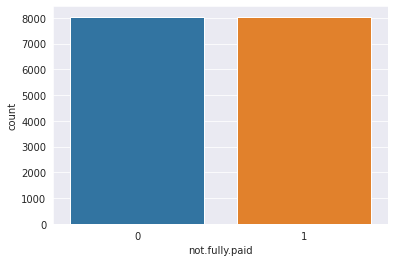

In [31]:
count_class_0, count_class_1 = data['not.fully.paid'].value_counts()
loan_0 = data[data['not.fully.paid'] == 0]
loan_1 = data[data['not.fully.paid'] == 1]
loan_1_over = loan_1.sample(count_class_0, replace=True)
loan_test_over = pd.concat([loan_0, loan_1_over], axis=0)
print('Random over-sampling:')
print(loan_test_over['not.fully.paid'].value_counts())

sns.set_style('darkgrid')
sns.countplot(x='not.fully.paid', data=loan_test_over)

In [32]:
col_fea = ['purpose']
final_data = pd.get_dummies(loan_test_over,columns=col_fea,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 7380
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               16090 non-null  int64  
 1   int.rate                    16090 non-null  float64
 2   installment                 16090 non-null  float64
 3   log.annual.inc              16090 non-null  float64
 4   dti                         16090 non-null  float64
 5   fico                        16090 non-null  int64  
 6   days.with.cr.line           16090 non-null  float64
 7   revol.bal                   16090 non-null  int64  
 8   revol.util                  16090 non-null  float64
 9   inq.last.6mths              16090 non-null  int64  
 10  delinq.2yrs                 16090 non-null  int64  
 11  pub.rec                     16090 non-null  int64  
 12  not.fully.paid              16090 non-null  int64  
 13  purpose_credit_card         1609

In [33]:
to_train = final_data[final_data['not.fully.paid'].isin([0,1])]
to_pred = final_data[final_data['not.fully.paid'] == 2]

X = to_train.drop('not.fully.paid', axis=1).values
y = to_train['not.fully.paid'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()

model.add(
        Dense(19, activation='relu')
)

model.add(
        Dense(10, activation='relu')
)

model.add(
        Dense(5, activation='relu')
)


model.add(
        Dense(1, activation='sigmoid')
)
model.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['accuracy']
)

early_stop = EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        verbose=1, 
        patience=25
)

model.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 8ms/step - loss: 0.6866 - accuracy: 0.5564 - val_loss: 0.6792 - val_accuracy: 0.5975
Epoch 2/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6722 - accuracy: 0.5974 - val_loss: 0.6635 - val_accuracy: 0.6043
Epoch 3/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6575 - accuracy: 0.6095 - val_loss: 0.6539 - val_accuracy: 0.6111
Epoch 4/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6493 - accuracy: 0.6147 - val_loss: 0.6505 - val_accuracy: 0.6178
Epoch 5/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.6188 - val_loss: 0.6470 - val_accuracy: 0.6174
Epoch 6/200
44/44 [==============================] - 0s 4ms/step - loss: 0.6435 - accuracy: 0.6181 - val_loss: 0.6449 - val_accuracy: 0.6161
Epoch 7/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6410 - accuracy: 0.6181 - val_loss: 0.6441 - val_accuracy: 0.6134
Epoch 8/200
4

<AxesSubplot:>

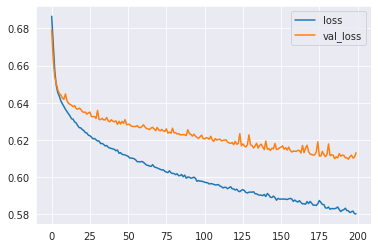

In [34]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [35]:
predictions = model.predict(X_test).astype('int')

print(
        confusion_matrix(y_test,predictions), 
        '\n', 
        classification_report(y_test,predictions)
)

[[2437    0]
 [2390    0]] 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      2437
           1       0.00      0.00      0.00      2390

    accuracy                           0.50      4827
   macro avg       0.25      0.50      0.34      4827
weighted avg       0.25      0.50      0.34      4827



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)

model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
44/44 [==============================] - 1s 11ms/step - loss: 0.6924 - binary_accuracy: 0.5149 - val_loss: 0.6864 - val_binary_accuracy: 0.5699
Epoch 2/200
44/44 [==============================] - 0s 7ms/step - loss: 0.6836 - binary_accuracy: 0.5470 - val_loss: 0.6773 - val_binary_accuracy: 0.5850
Epoch 3/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6785 - binary_accuracy: 0.5638 - val_loss: 0.6681 - val_binary_accuracy: 0.6066
Epoch 4/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6738 - binary_accuracy: 0.5726 - val_loss: 0.6627 - val_binary_accuracy: 0.6136
Epoch 5/200
44/44 [==============================] - 0s 5ms/step - loss: 0.6718 - binary_accuracy: 0.5740 - val_loss: 0.6604 - val_binary_accuracy: 0.6124
Epoch 6/200
44/44 [==============================] - 0s 6ms/step - loss: 0.6686 - binary_accuracy: 0.5831 - val_loss: 0.6580 - val_binary_accuracy: 0.6134
Epoch 7/200
44/44 [==============================] - 0s 9ms/step - lo

<AxesSubplot:>

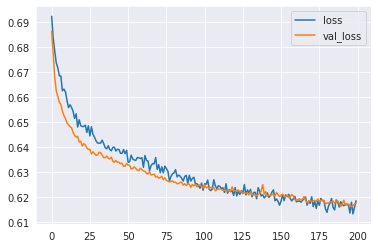

In [37]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 

In [38]:
predictions_new = (model_new.predict(X_test) >= 0.2).astype('int')

print(
        confusion_matrix(y_test,predictions_new), 
        '\n', 
        classification_report(y_test,predictions_new)
)

[[ 261 2176]
 [  28 2362]] 
               precision    recall  f1-score   support

           0       0.90      0.11      0.19      2437
           1       0.52      0.99      0.68      2390

    accuracy                           0.54      4827
   macro avg       0.71      0.55      0.44      4827
weighted avg       0.71      0.54      0.43      4827



# Thank You